In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

import warnings # this is optional
warnings.filterwarnings('ignore')

**Matplotlib** offers extensive customization but demands more code, **Seaborn** simplifies statistical plots with built-in themes, and **Plotly** excels at creating dynamic and interactive visualizations.

Let's look at the data

In [2]:
df = pd.read_csv('heart_d.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Variables**:
* **Age** : age of the patient (*years*)
* **Sex** : sex of the patient (*M: Male, F: Female*)
* **ChestPainType** : chest pain type (*TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic*)
* **RestingBP** : resting blood pressure (*mm Hg*)
* **Cholesterol** : serum cholesterol (*mm/dl*)
* **FastingBS** : fasting blood sugar (*1: if FastingBS > 120 mg/dl, 0: otherwise*)
* **RestingECG** : resting electrocardiogram results (*Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria*)
* **MaxHR** : maximum heart rate achieved (*Numeric value between 60 and 202*)
* **ExerciseAngina** : exercise-induced angina (*Y: Yes, N: No*)
* **Oldpeak** : oldpeak = ST (*Numeric value measured in depression*)
* **ST_Slope** : the slope of the peak exercise ST segment (*Up: upsloping, Flat: flat, Down: downsloping*)
* **HeartDisease** : output class (*1: heart disease, 0: Normal*)

## Exploratory Data Analysis (EDA) & Visualization
* Better understanding of the given dataset and helps clean up the given dataset.
* It gives us a clear picture of the features and the relationships between them.
* Identifying outliers.

### Basic information

In [22]:
df.shape

(918, 12)

We have 918 rows and 12 columns

In [24]:
df.columns # And these are our columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

What are the types of the columns?

In [25]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Primarily we have quantative variables

#### Missing values

In [27]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Looks like there are **no missing values**

#### Unique values

In [122]:
pd.concat([df.dtypes.rename('Data types'), df.nunique().rename('Unique values')],
          axis=1)

,Data types,Unique values
Age,int64,50
Sex,object,2
ChestPainType,object,4
RestingBP,int64,67
Cholesterol,int64,222
FastingBS,int64,2
RestingECG,object,3
MaxHR,int64,119
ExerciseAngina,object,2
Oldpeak,float64,53


As we see all categorical variavles don't have a lot of unique values (We treat "FastingBS" as a categorical variable): from 2 to 4

#### Checking for Duplicates

In [60]:
df.duplicated() # marks duplicates as True except for the first occurrence.

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [61]:
df.duplicated().sum()

0

There are **no duplicated values**, I guess we're lucky

#### Summarize

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We see everything we saw before but in a different form

In [64]:
df.describe().T # some general information about the quantative variables in the data set

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


As we see the average age is 53

In [65]:
df.describe(include = object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


Do we see it rihgt?
<br>It looks like the **class "Sex" is imbalanced**
<br>Let's see it

In [67]:
df.groupby(['Sex', 'HeartDisease']).HeartDisease.count()

Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [72]:
# Let's compare proportions
print(f'{458 / 725 * 100:.2f}% of males have heart desiase and {50 / 143 * 100:.2f}% of females')

63.17% of males have heart desiase and 34.97% of females


Most of the patients in the data are males and the proportion of healthy women is bigger than healty men in the data

What about our target variable?

In [30]:
df.FastingBS.value_counts(normalize = True)

FastingBS
0    0.766885
1    0.233115
Name: proportion, dtype: float64

23% of all patients have fasting blood sugar and 76% don't

### Visualization
Let's add several charts and graphs so we could see the differences and get a better understanding of our data
<br>*Some plots and their code were taken from my another EDA (Students Exam Perfomance)*

#### Basic information about the number of men and women and also the number of people with Heart Disease

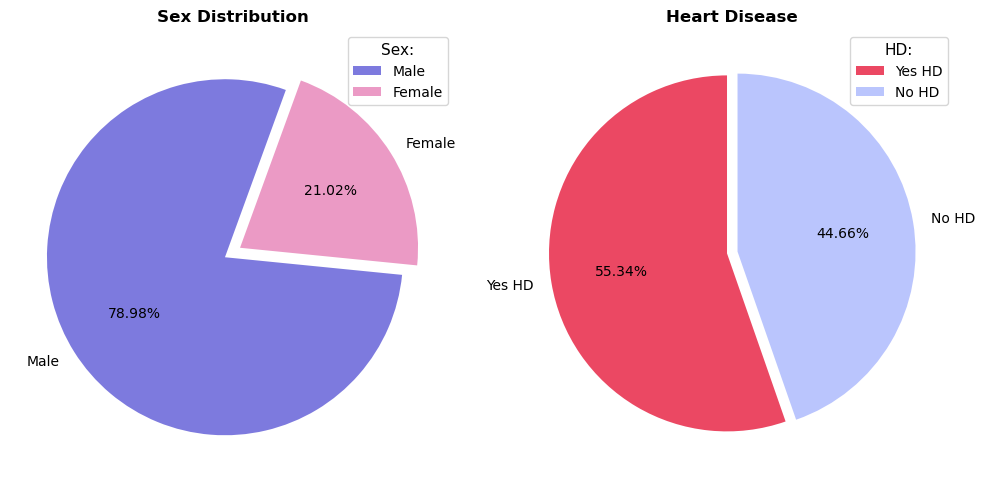

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (10, 10))



axes[0].pie(df.Sex.value_counts(), 
        labels = ['Male', 'Female'], 
        explode= [0.05, 0.05], 
        startangle = 70, 
        colors = ['#7D7ADE', '#EB9AC5'], 
        autopct = '%.2f%%')

legend = axes[0].legend(title = "Sex:",
           loc = 'upper right',
           fontsize="10")
legend.get_title().set_fontsize(11)
axes[0].set_title('Sex Distribution', fontweight='bold')
# leg = ax.legend()
# leg.set_title('A great legend',prop={'size':14}) just another way of doing this


axes[1].pie(df.HeartDisease.value_counts(), 
        labels = ['Yes HD', 'No HD'], 
        explode= [0.03, 0.03], 
        startangle = 90, 
        colors = ['#EB4863', '#BAC5FD'], 
        autopct = '%.2f%%')

legend = axes[1].legend(title = "HD:",
           loc = 'upper right',
           fontsize="10")
legend.get_title().set_fontsize(11)
axes[1].set_title('Heart Disease', fontweight='bold')




plt.tight_layout()
plt.show() # to remove unnecessary description at the top of the graph


We can say that class "HeartDisease" is not highly imbalbanced (the difference is just 11%) unlike the class Sex

We can add another chart to see the difference between these two classes (**Heart Disease vs Sex**)

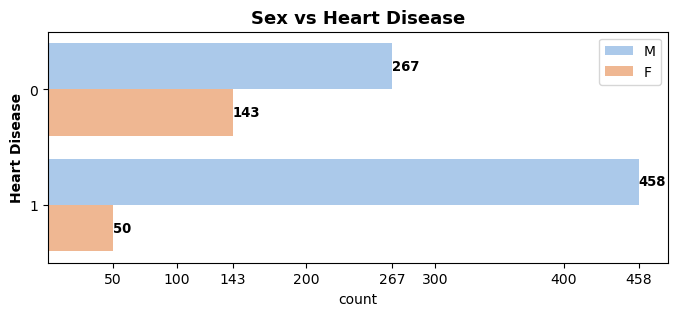

In [102]:
plt.figure(figsize=(8, 3))

chart = sns.countplot(y = "HeartDisease",
                      hue = "Sex",
                      data = df,palette= 'pastel') # y = ... changer graph to horizontal one
chart.legend(loc='upper right',
             frameon=True)

plt.title('Sex vs Heart Disease',
          fontsize = 13,
          fontweight='bold')

x_ticks = list(df.groupby([ 'HeartDisease', 'Sex']).HeartDisease.count().values)

#for i in range(len(x_ticks)): # So we could see the lines
#    plt.axvline(x_ticks[i],
#            color='gray',
#            linewidth=1,
#            alpha = 0.5)

for container in chart.containers:
    chart.bar_label(container,
                    color='black',
                    size=9.5,
                    fontweight='bold') # So we could see the numbers 


chart.set_xticks(sorted([100, 200, 300, 400] + x_ticks))
chart.set_ylabel('Heart Disease',
                 fontweight = 'bold')

plt.show()

#### Let's look at the age distribution

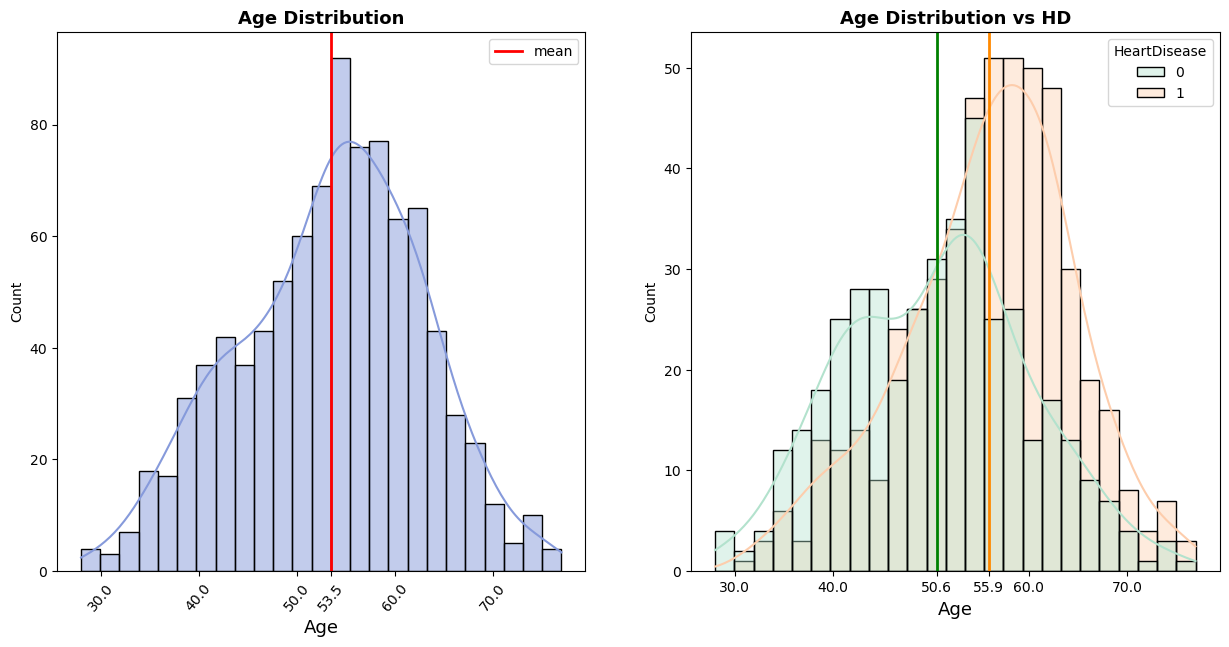

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data = df,
             x = 'Age',
             bins = 25,
             kde = True,
             color = '#869ADB',
             ax = axes[0])
axes[0].set_title('Age Distribution',
          fontweight="bold",
          size=13)

axes[0].axvline(np.mean(df['Age']), color='red', linewidth=2, label="mean")
axes[0].legend()
axes[0].set_xlabel('Age', size = 13)
axes[0].set_xticks([30, 40, 50, np.round(np.mean(df['Age']),1), 60, 70])
axes[0].set_xticklabels(axes[0].get_xticks(), rotation = 50)


# 
no_hd = np.round(np.mean(df[df['HeartDisease'] == 0]['Age']),1)
yes_hd = np.round(np.mean(df[df['HeartDisease'] == 1]['Age']),1)
sns.histplot(data = df,
             x = 'Age',
             bins = 25,
             kde = True,
             palette = 'Pastel2',
             ax = axes[1],
             hue='HeartDisease',alpha = 0.4)

axes[1].set_title('Age Distribution vs HD',
          fontweight="bold",
          size=13)

axes[1].axvline(no_hd,
                color='green',
                linewidth=2,
                label="none course mean")
axes[1].axvline(yes_hd,
                color='#FF8900',
                linewidth=2,
                label="course completed mean")
axes[1].set_xlabel('Age', size = 13)
axes[1].set_xticks([30, 40, no_hd,yes_hd, 60, 70]) # we add means to the graph

plt.show()

* According to the graph, people with heart disease tend to be almost 6 years older
* The distribution of people with heart disease resembles normal (but we'll check that later)

In [118]:
# More information about Age and HD
df.groupby(['HeartDisease']).Age.agg(['count', 'mean', 'median', 'std', 'max', 'min'])

,count,mean,median,std,max,min
HeartDisease,,,,,,
0,410,50.551220,51.0,9.444915,76,28
1,508,55.899606,57.0,8.727056,77,31


It seems that not only means are different but also medians

#### Chest Pain Type and Sex
We want to see if men and women have diffrent types or they have primarily just one type of pain

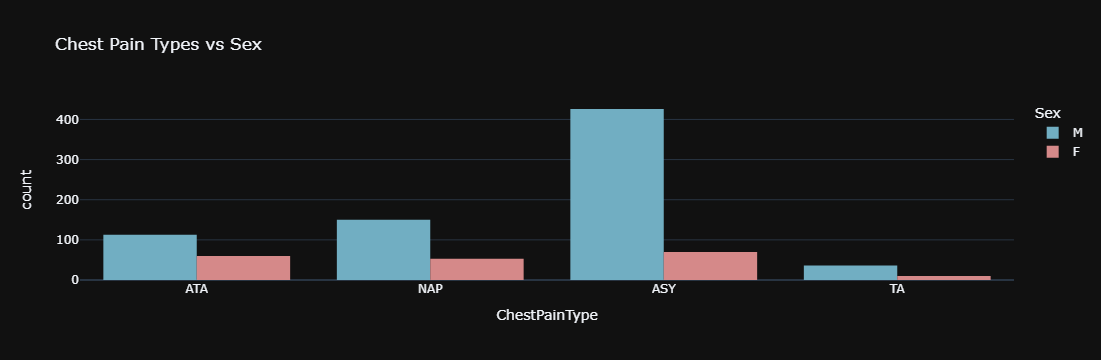

In [104]:
# we're using px as it is provides us with additional details 
fig = px.histogram(df, 
                   x="ChestPainType",
                   color="Sex",
                   hover_data=df.columns,
                   title="Chest Pain Types vs Sex",
                   barmode="group",
                   template='plotly_dark',
                   color_discrete_sequence=['#71AEC2 ','#D58989'])
fig.show()

* As we see most men have Asymptomatic type
* Typical Angina (TA) is the rarest type of all
* Women don't have any specific type of chest pain

#### But how is chest pain related to presence of Heart Disease?

Maybe some types of pain cause heart problems or heart problems cause any specific type of pain (*Hypotheses testing could come in handy*)

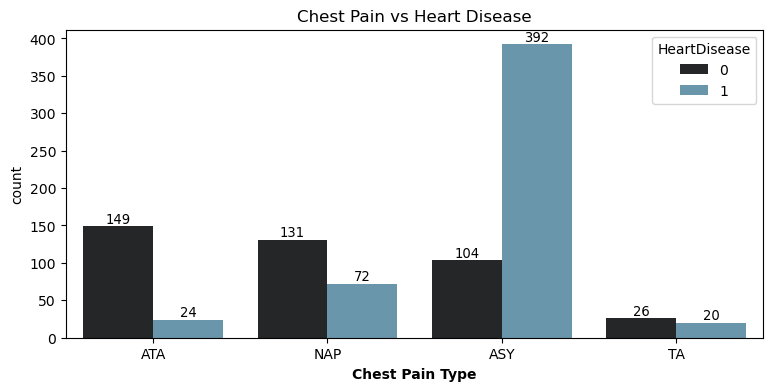

In [119]:
plt.figure(figsize = (9, 4))

ax = sns.countplot(data = df, 
              x = 'ChestPainType',
              color='#5F9AB7',
             hue = 'HeartDisease')

plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type',
           fontsize = 10,
           fontweight = 'bold')

for container in ax.containers:
    ax.bar_label(container,
                    color='black',
                    size=9.5)


plt.show()

**Conclusion**:
<br>According to the chart, the most imbalanced types are ASY and ATA (we might check some hypotheses later) whereas TA is not accossiated with Heart Diseases

#### Quantative variables
It's time to analyse our quantative variables and their influence on target variable
<br>We're especially interested in RestingBP and Cholesterol (maybe MaxHR but we'll see if we have time) and correlation between each other

At first let's see how *RestingBP is related to Heart Disease and Fasting blood sugar*

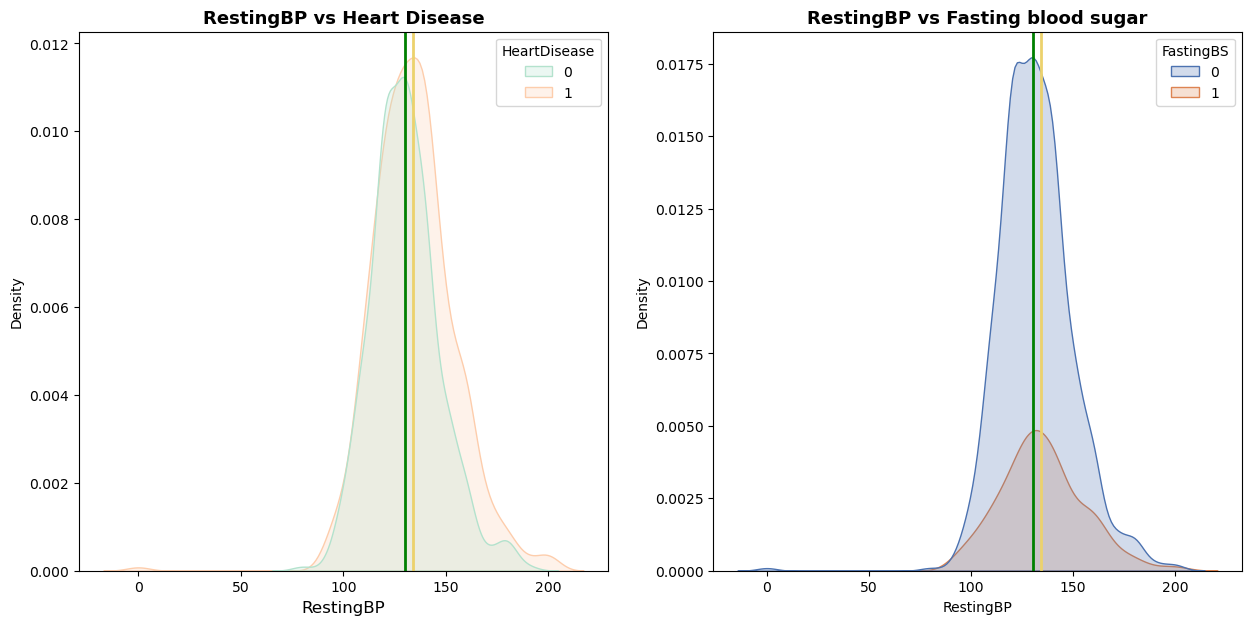

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Create first graph
sns.kdeplot(data = df,
            x = 'RestingBP',
            hue ="HeartDisease",
            fill = True,
            ax = axes[0],
            palette = 'Pastel2')
axes[0].set_title('RestingBP vs Heart Disease',
          fontweight="bold",
          size=13)
# Setting means
yes_hd = np.round(np.mean(df[df['HeartDisease'] == 1]['RestingBP']),1) 
no_hd = np.round(np.mean(df[df['HeartDisease'] == 0]['RestingBP']), 1)
# Drawing lines (means)
axes[0].axvline(yes_hd,
                color='#ECD26C',
                linewidth=2)
axes[0].axvline(no_hd,
                color='green',
                linewidth=2,)
axes[0].set_xlabel('RestingBP', size = 12)


# the second plot
sns.kdeplot(data = df,
            x = 'RestingBP',
            hue ="FastingBS",
            fill = True,
            ax = axes[1],
            palette = 'deep')
axes[1].set_title('RestingBP vs Fasting blood sugar',
          fontweight="bold",
          size=13)
# Setting means
yes_bs = np.round(np.mean(df[df['FastingBS'] == 1]['RestingBP']),1) 
no_bs = np.round(np.mean(df[df['FastingBS'] == 0]['RestingBP']), 1)
# Drawing lines (means)
axes[1].axvline(yes_hd,
                color='#ECD26C',
                linewidth=2)
axes[1].axvline(no_hd,
                color='green',
                linewidth=2,)



plt.show()

The graphs show that RestingBP is not associated with Heart Problems or Fasting Blood Sugar (we'll use hypothesis testing later to prove our point), because of the shape and mean diffrence
<br>**Need testing!**

In [12]:
df.groupby('HeartDisease').RestingBP.agg(['mean', 'median', 'std', 'max'])

,mean,median,std,max
HeartDisease,,,,
0,130.180488,130.0,16.499585,190
1,134.185039,132.0,19.828685,200


Of course we saw that people with Heart Problems tend to have greater RestingBP (but is the difference big enogh to say that there these variables are related)

##### Cholesterol and Heart Problems

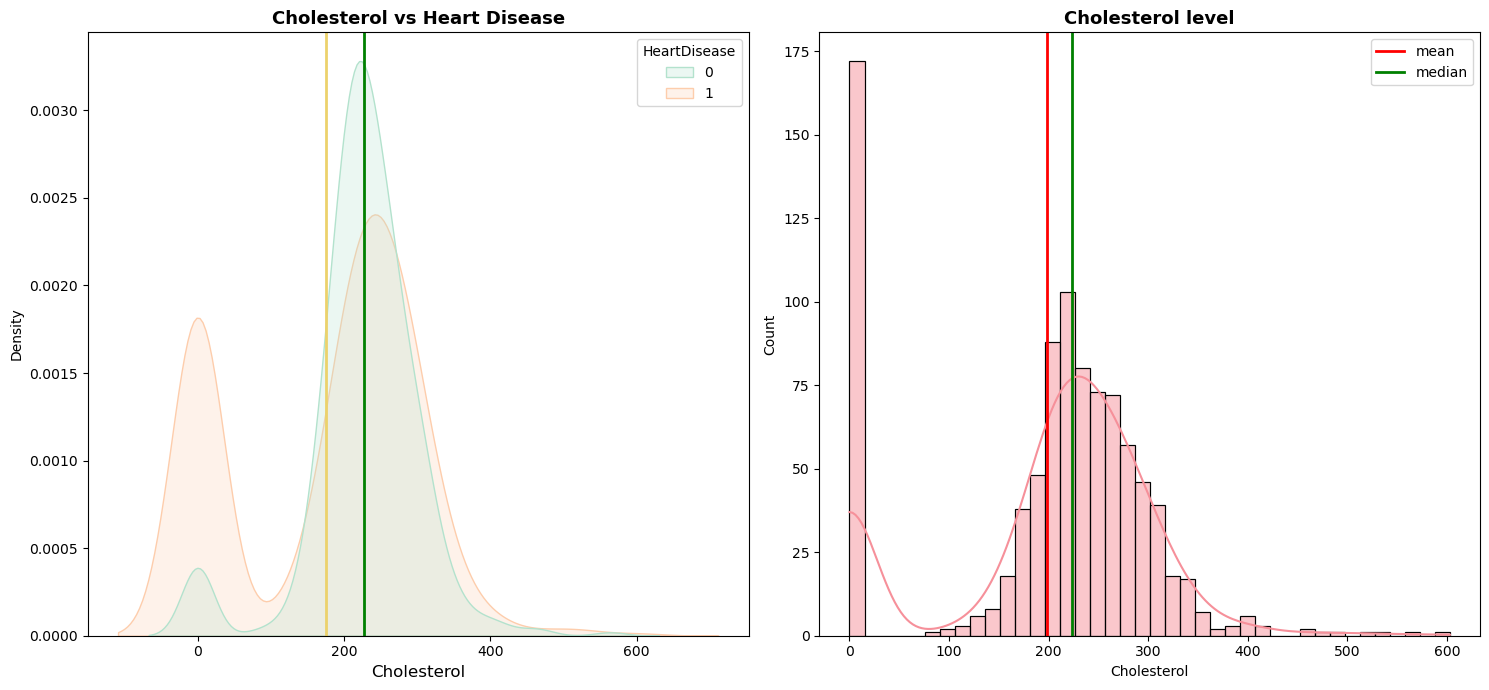

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# The first plot
sns.kdeplot(data = df,
            x = 'Cholesterol',
            hue ="HeartDisease",
            fill = True,
            ax = axes[0],
            palette = 'Pastel2')
axes[0].set_title('Cholesterol vs Heart Disease',
          fontweight="bold",
          size=13)
# Setting means
yes_hd = np.round(np.mean(df[df['HeartDisease'] == 1]['Cholesterol']),1) 
no_hd = np.round(np.mean(df[df['HeartDisease'] == 0]['Cholesterol']), 1)
# Drawing lines (means)
axes[0].axvline(yes_hd,
                color='#ECD26C',
                linewidth=2)
axes[0].axvline(no_hd,
                color='green',
                linewidth=2,)
axes[0].set_xlabel('Cholesterol', size = 12)


# the second plot
sns.histplot(data = df,
             x = 'Cholesterol',
             bins = 40, kde = True,
             ax = axes[1],
             color = '#F6909A')
axes[1].set_title('Cholesterol level',
                  fontweight="bold",
                  size = 13)
axes[1].axvline(np.mean(df['Cholesterol']), color='red', linewidth=2, label="mean")
axes[1].axvline(np.median(df['Cholesterol']), color='green', linewidth=2, label="median")
axes[1].legend()


plt.tight_layout()
plt.show()

**Conclusion**:
<br>It's hard to say something since cholesterol has bimodal distribution and most people have cholesterol level = 0
<br>Actually, it's a strange tendency and I'm begginig to question our Data...
<br>In the real situation we would ask an expret

##### Now we're going to see how MaxHR is related to Heart Problems and ST_Slope at the same time

<Figure size 800x300 with 0 Axes>

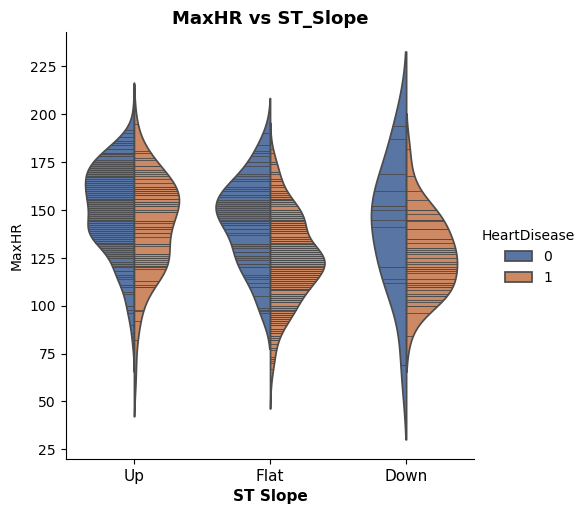

In [23]:
plt.figure(figsize=(8,3))

sns.catplot(data = df,
            x = "ST_Slope",
            y = "MaxHR",
            hue = "HeartDisease",
            kind = "violin",
            inner = "stick", # inner is an argument of a violin plot (representation of the data in the violin interior)
            split = True,
            palette = "deep")

plt.title('MaxHR vs ST_Slope',
          fontsize=13,
          fontweight='bold')

plt.xlabel('ST Slope', size = 11, fontweight = 'bold')
plt.xticks( size = 11)

plt.show()

**Conclusion**:
<br>According to the chart, people with Heart Disease tend to have lower Heart Rate than people without Heart Disease
<br>The difference is especially noticable with ST Slope being flat or down

##### Overall information about the means:

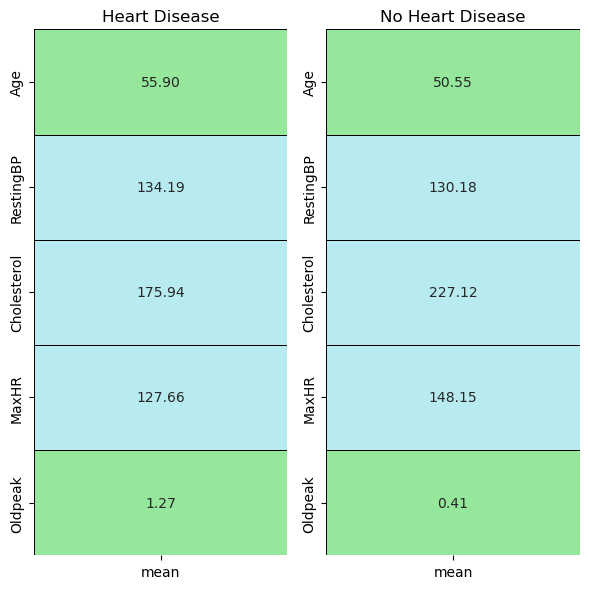

In [36]:
yes = df[df['HeartDisease'] == 1].describe().T.drop(['HeartDisease','FastingBS'], axis =0)
no = df[df['HeartDisease'] == 0].describe().T.drop(['HeartDisease','FastingBS'], axis =0)
colors = ['#95E89B','#B7EBF0']

fig, axes = plt.subplots(1, 2, figsize = (6, 6))
sns.heatmap(yes[['mean']],
            annot = True,
            cmap = colors,
            linewidths = 0.4,
            linecolor = 'black',
            cbar = False,
            fmt = '.2f',
            ax=axes[0])
axes[0].set_title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],
            annot = True,
            cmap = colors,
            linewidths = 0.4,
            linecolor = 'black',
            cbar = False,
            fmt = '.2f',
            ax = axes[1])
axes[1].set_title('No Heart Disease');

plt.tight_layout()
plt.show()

**Conclusion**:
<br>Actually, this is not neccessary but it might come in handy and it's also a nice visualization trick

##### The last thing to check is correlation (For example, between RestingBP and MaxHR)

<Figure size 800x300 with 0 Axes>

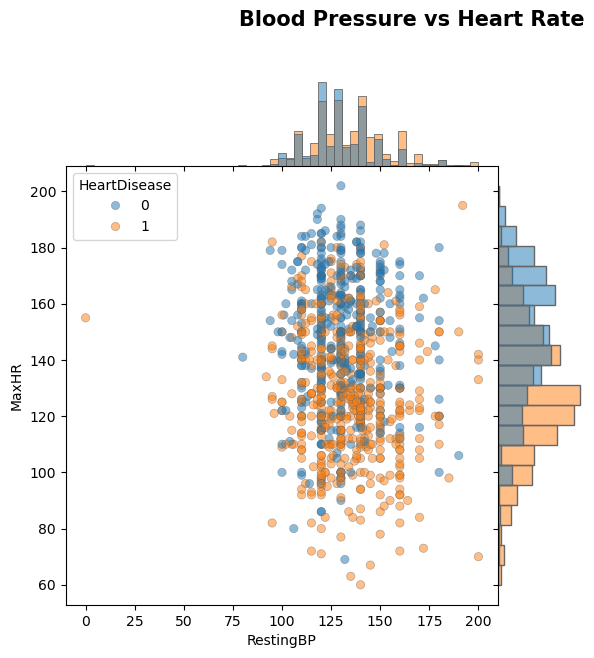

In [34]:
plt.figure(figsize=(8,3))

graph = sns.JointGrid(data = df, # sns.jointplot()
                      x = 'RestingBP',
                      y = 'MaxHR',
                      hue = "HeartDisease",
                      space = 0)
graph.plot(sns.scatterplot, sns.histplot, alpha=.5, edgecolor=".4")


plt.title('Blood Pressure vs Heart Rate',
          fontsize = 15,
          fontweight = 'bold',
          y = 1.3,
          loc = "right")

plt.show()

**Conclusion**:
<br>We can make an assumption that if correlation exists it is very small but it helped us to detect outliers

## Outliers
Finding and dealing with them

At first we're going to use box-plot to undentify them

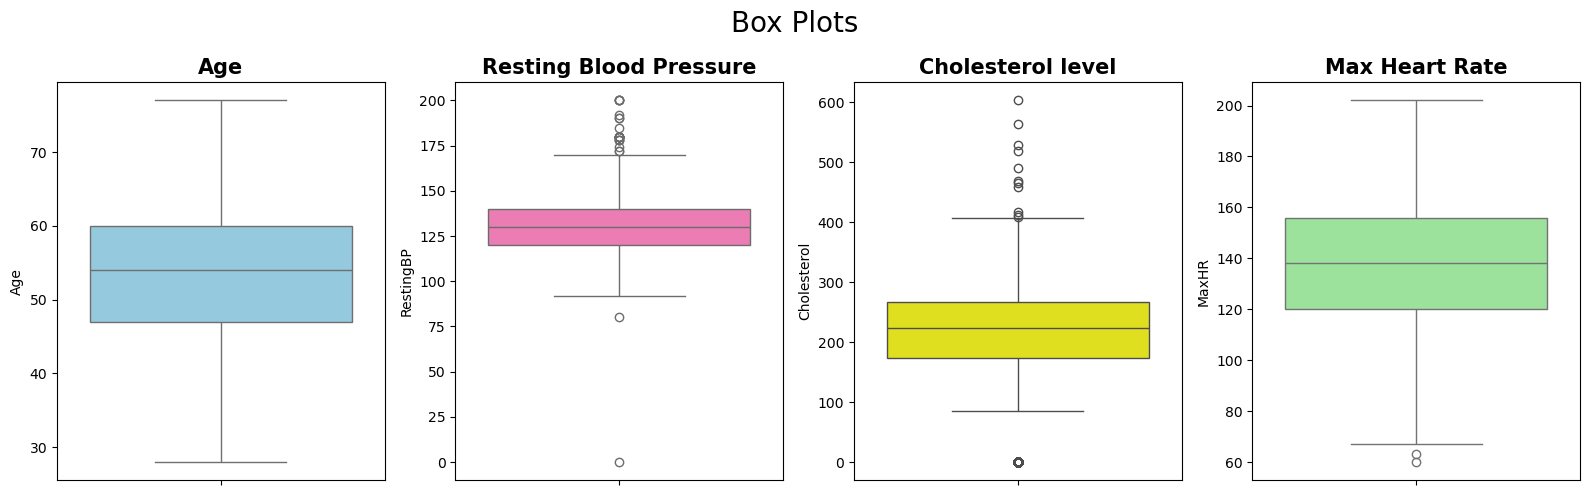

In [38]:
fig, axes = plt.subplots(1,4, figsize=(16,5))

fig.suptitle('Box Plots', size = 20)

sns.boxplot(df['Age'],
            color='skyblue',
            ax = axes[0])
axes[0].set_title('Age',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['RestingBP'],
            color='hotpink',
            ax = axes[1])
axes[1].set_title('Resting Blood Pressure',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['Cholesterol'],
            color='yellow',
            ax = axes[2])
axes[2].set_title('Cholesterol level',
                  fontweight="bold",
                  size = 15)

sns.boxplot(df['MaxHR'],
            color='lightgreen',
            ax = axes[3])
axes[3].set_title('Max Heart Rate',
                  fontweight="bold",
                  size = 15)


plt.tight_layout() # automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

##### Conclusion:
* Although Cholesterol level can be low it can't be 0
* RestingBP also can't be 0 (it would mean that the patient is dead)
* MaxHR and Age look fine (just regular box plots)

In [40]:
lst = ['RestingBP', 'Cholesterol']

for i in lst:
    q1, q2, q3 = np.quantile(df[i], [0.25, 0.5, 0.75])
    iqr = stats.iqr(df[i])
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    n_outliers = df[df[i] < q1 - 1.5 * iqr].shape[0] # just another way of doing it
    print(i)
    print(f'Anything outside this range is an outlier: ({lower_bound}, {upper_bound})')
    print("Outliers: ",df[(df[i] < lower_bound) | (df[i] > upper_bound)][i].values)
    print('Number of outliers:', n_outliers)
    print()

RestingBP
Anything outside this range is an outlier: (90.0, 170.0)
Outliers:  [190 180 180 180 200 180 180 180  80 200 185 200 180 180   0 178 172 180
 190 174 178 180 200 192 178 180 180 172]
Number of outliers: 2

Cholesterol
Anything outside this range is an outlier: (32.625, 407.625)
Outliers:  [468 518 412 529 466 603 491   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   

#### Dealing with Outliers

I think we all agree that BP can't be 0

In [4]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Ok, this patient has MaxHR but their Cholesterol and Resting BP is 0 (Something is wrong)
<br>There are many ways to delete this row

In [5]:
# df = df[df['RestingBP'] != 0]
# df = df.query('RestingBP != 0')

df = df.drop(df[df['RestingBP'] == 0].index)

The disease, known as familial **hypercholesterolemia**, affects about 1 in 500 people and can cause **total cholesterol levels from 300 mg/dL to 600 mg/dL**, as well as heart attacks early in life.
<br>So it's ok when we see these numbers but Cholesterol can't be 0 so it must be replaced

##### Mean or median imputation
Which one should we use?
<br>If the data follows a normal distribution, filling missing values with the mean is a reasonable choice.

Let's see the graph without those points

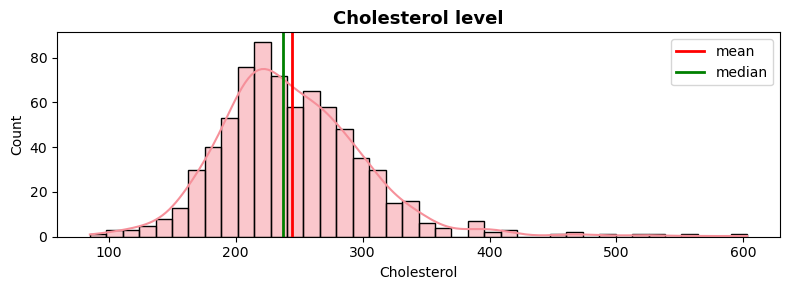

In [54]:
plt.figure(figsize=(8,3))

sns.histplot(data = df[df['Cholesterol'] > 0],
             x = 'Cholesterol',
             bins = 40, kde = True,
             color = '#F6909A')
plt.title('Cholesterol level',
                  fontweight="bold",
                  size = 13)
plt.axvline(np.mean(new_df['Cholesterol']), color='red', linewidth=2, label="mean")
plt.axvline(np.median(new_df['Cholesterol']), color='green', linewidth=2, label="median")
plt.legend()


plt.show()

it looks like normal distribution with extra long tails but one chart is not enough
<br>What about the skewness?

In [6]:
df[df['Cholesterol'] > 0].Cholesterol.skew()

1.238534436848176

the data is **extremely skewed**

The last chance is **Shapiro-Wilk Test**

In [60]:
stats.shapiro(df[df['Cholesterol'] > 0].Cholesterol)[1]

2.1515859433204582e-17

p-value is less than the threshold (0.05) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

In [61]:
print('Mean: {}'.format(np.mean(df[df['Cholesterol'] > 0].Cholesterol)))
print('Median: {}'.format(np.median(df[df['Cholesterol'] > 0].Cholesterol)))
print('Mode: {}'.format(stats.mode(df[df['Cholesterol'] > 0].Cholesterol)))

Mean: 244.6353887399464
Median: 237.0
Mode: ModeResult(mode=254, count=11)


##### When to fill missing values with the median:
Skewed or non-normal data: If the data is heavily skewed or has outliers, the median is a better choice as it is robust to extreme values. The median represents the middle value and is less influenced by extreme observations.

In [7]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = np.nan      # since it ca't be zero (it's impossible)
df["Cholesterol"] = df["Cholesterol"].fillna(np.median(df[df['Cholesterol'] > 0].Cholesterol))

Now can divide Cholesterol level into 3 groups

In [91]:
pd.cut(df["Cholesterol"], bins=[0, 200, 240 , 600], labels=["Normal","Borderline","High" ] ).value_counts()
#print("Value Counts :\n\n",s.value_counts())

Cholesterol
Borderline    412
High          354
Normal        150
Name: count, dtype: int64

## Hypothesis Testing

Hypothesis testing is essential. In machine learning, various vital decisions are made on the basis of hypothesis testing such as:
* Choosing the best algorithm
* Choosing the best feature variables
* Choosing the best samples
* Choosing the best hyperparameters
* Choosing the best statistical and probability distribution etc.

Every teting is going to be based on associations with the target variable (having heart disease)
<br>So we'll split the data in advance

In [97]:
yes_hd = df[df['HeartDisease'] == 1]
no_hd = df[df['HeartDisease'] == 0]

#### Cholesterol levels for patients with heart disease

A total cholesterol level of **240 mg/dL** (6.21 mmol/L) **or greater** is considered high

In [104]:
yes_hd['Cholesterol'].shape

(507,)

In [103]:
mean_chol_hd = np.mean(yes_hd.Cholesterol)

In [100]:
print("Mean: ", mean_chol_hd) # as we can see it is 5% higher than 240
print(f'Diffrence: {round(mean_chol_hd, 2)} - 240 = {round(mean_chol_hd - 240, 2)}')

Mean:  246.87376725838266
Diffrence: 246.87 - 240 = 6.87


So we can form a hypothesis (The significance level is set at 0.05 or 5%)
* H_0: People with heart disease have an average cholesterol level equal to 240 mg/dl
* H_1: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

In [101]:
stat, pval = stats.ttest_1samp(yes_hd['Cholesterol'], 240, alternative = 'greater')

In [102]:
print(pval)
print(f"{round(pval * 100, 2)}%")

0.0017372496798275414
0.17%


This is less than 0.05 (0.0017 < 0.05), suggesting that heart disease patients have an average cholesterol level significantly higher than 240 mg/dl
<br>**Conclusion**:
<br>This means that if 507 people were randomly selected from the whole population (who had an average cholesterol level equal to 240 mg/dl), there is a 0.17% chance of their average cholesterol level being at least 7 mg/dl greater than the average level

#### Cholesterol levels for patients without heart disease
Do patients without heart disease have average cholesterol levels significantly different from 240 mg/dl?

In [107]:
chol_no_hd = no_hd['Cholesterol']

In [109]:
# The number of patients
chol_no_hd.shape

(410,)

In [111]:
print("Mean: ", np.mean(chol_no_hd))
print(f'Diffrence: {round(np.mean(chol_no_hd), 2)} - 240 = {round(np.mean(chol_no_hd) - 240, 2)}')

Mean:  238.6829268292683
Diffrence: 238.68 - 240 = -1.32


Forming a hypothesis (The significance level is set at 0.05 or 5%)
* H_0: People with heart disease have an average cholesterol level equal to 240 mg/dl
* H_1: People with heart disease have an average cholesterol level that is NOT equal to 240 mg/dl

In [112]:
stat, pval = stats.ttest_1samp(chol_no_hd, 240, alternative = 'two-sided')

In [113]:
print(pval)
print(f"{round(pval * 100, 2)}%")

0.6218254603551769
62.18%


**Conclusion**:
<br>p-value (0.62 > 0.05) is not significant so we fail to reject the null hypothesis and cannot accept the alternative hypothesis

#### ST-Slope and Heart Problems

At first let's look at the contigency table and maybe we'll see patterns

In [133]:
Xtab = pd.crosstab(df.ST_Slope, df.HeartDisease)
print(Xtab)

HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  380
Up            317   78


It seems we don't have to use hyporhesis testing so we could tell that there is definatelly association between these two
<br>But still

* **H_o**: There is NOT an association between ST slope and whether or not someone is diagnosed with heart disease. 
* **H_a**: There is an association between  ST slope and whether or not someone is diagnosed with heart disease.

In [135]:
chi2, pval, dof, exp = stats.chi2_contingency(Xtab)

In [136]:
print(pval)

7.566932580265743e-78


**Conclusion**:
<br>We can certainly reject the null hypothesis (7.566932580265743e-78 < 0.05)

#### Maximum Heart Rate and Heart Disease
Is the maximum heart rate achieved associated with whether or not a patient will ultimately be diagnosed with heart disease?

In [114]:
hr_yes = yes_hd['MaxHR']
hr_no = no_hd['MaxHR']

In [123]:
# the difference in HeartRates for patients diagnosed with heart disease compared to patients without heart disease
mean_diff = np.mean(hr_no) - np.mean(hr_yes)

In [118]:
print(f'Median_hd: {np.median(hr_yes)} and Mean_hd: {np.mean(hr_yes)}')
print(f'Median_no_hd: {np.median(hr_no)} and Mean_no_hd: {np.mean(hr_no)}')
print('"MaxHR" mean Difference: ', mean_diff)

Median_hd: 126.0 and Mean_hd: 127.60157790927022
Median_no_hd: 150.0 and Mean_no_hd: 148.15121951219513
"MaxHR" mean Difference:  20.549641602924908


* H_0: The average MaxHR for a person with heart disease is equal to the average MaxHR for a person without heart disease.
* H_1: The average MaxHR for a person with heart disease is NOT equal to the average MaxHR for a person without heart disease.

In [120]:
tstat, pval = stats.ttest_ind(hr_yes, hr_no)

In [122]:
print('p-value for `Max Heart Rate` two-sample t-test: ', pval)

p-value for `Max Heart Rate` two-sample t-test:  8.044072537846356e-37


**Conclusion**:
<br>This is less than 0.05, so we “reject the null hypothesis” and conclude that there is a significant difference in thalach for people with heart disease compared to people without heart disease.

#### Is the variable "age" is also significantly associated with heart disease?

In [124]:
age_hd = yes_hd.Age
age_no_hd = no_hd.Age

In [127]:
# the difference in mean age for patients diagnosed with heart disease compared to patients without heart disease
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print("'Age' mean Difference: ", mean_diff)

'Age' mean Difference:  5.350161158416313


* H_0: The average age for a person with heart disease is equal to the average age for a person without heart disease.
* H_1: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.

In [128]:
tstat, pval = stats.ttest_ind(age_hd, age_no_hd)

In [129]:
print("p-value for 'Age' two-sample t-test: ", pval)

p-value for 'Age' two-sample t-test:  3.1608374545678206e-18


**Conclusion**:
<br>Using a 0.05 significance threshold, we can conclude that age (p = 8.955636917529706e-05) is significantly associated with heart disease

#### Association between pain type and Heart Problems

In [130]:
Xtab = pd.crosstab(df.ChestPainType, df.HeartDisease)
print(Xtab)

HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   71
TA              26   20


Based on this table, it seems like people who are diagnosed with heart disease tend to have asymptomatic type of pain, while people without heart disease tend to have different kinds of chest pain
<br>But still we have to test it

* **H_o**: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease. 
* **H_a**: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

In [131]:
chi2, pval, dof, exp = stats.chi2_contingency(Xtab)

In [132]:
print(pval)

5.348821918587953e-58


**Conclusion**:
<br>This is much less than 0.05, so we can conclude that there is a significant association between these variables.

#### FastingBS, RestingECG, ExerciseAngina, Sex and Heart Disease

Now we are going to test other categorical variables but we'll do it faster

In [151]:
for i in ['FastingBS', 'RestingECG', 'ExerciseAngina', 'Sex']:
    Xtab = pd.crosstab(df[i], df.HeartDisease)
    print(Xtab)
    chi2, pval, dof, exp = stats.chi2_contingency(Xtab)
    print(f'p-value for (Heart Disease and {i}) is {pval}')
    print()

HeartDisease    0    1
FastingBS             
0             366  337
1              44  170
p-value for (Heart Disease and FastingBS) is 9.215944248776643e-16

HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  284
ST             61  117
p-value for (Heart Disease and RestingECG) is 0.0039471230239550015

HeartDisease      0    1
ExerciseAngina          
N               355  191
Y                55  316
p-value for (Heart Disease and ExerciseAngina) is 1.899519261220225e-50

HeartDisease    0    1
Sex                   
F             143   50
M             267  457
p-value for (Heart Disease and Sex) is 5.2809560649710597e-20



**Coclusion**:
<br>As we see all variables are associated with Heart Problems (some of them more than others)

## Feature Engineering

At first let's look at our variables and remember their types

In [8]:
numerical = df.select_dtypes(include=['number']).columns
categorical = df.select_dtypes(include=['object']).columns

print('Numerical:',numerical)
print("**********"*10)
print("Categorical:",categorical)

Numerical: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
****************************************************************************************************
Categorical: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


As we know categorical variables must be converted to numerical because most models can't work with caterical data

In [9]:
import category_encoders as ce

In [10]:
# One-Hot encoding
encoder = ce.OrdinalEncoder(cols=['ChestPainType','RestingECG','ST_Slope'])
df_final = encoder.fit_transform(df)

In [11]:
df_final.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,1,140,289.0,0,1,172,N,0.0,1,0
1,49,F,2,160,180.0,0,1,156,N,1.0,2,1
2,37,M,1,130,283.0,0,2,98,N,0.0,1,0
3,48,F,3,138,214.0,0,1,108,Y,1.5,2,1
4,54,M,2,150,195.0,0,1,122,N,0.0,1,0


In [12]:
# One-Hot encoding
df_final = pd.get_dummies(df_final,
               columns = ['Sex', 'ExerciseAngina'],
               drop_first= True,
               dtype = np.int8)

In [13]:
df_final.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,1,140,289.0,0,1,172,0.0,1,0,1,0
1,49,2,160,180.0,0,1,156,1.0,2,1,0,0
2,37,1,130,283.0,0,2,98,0.0,1,0,1,0
3,48,3,138,214.0,0,1,108,1.5,2,1,0,1
4,54,2,150,195.0,0,1,122,0.0,1,0,1,0


Now all columns have numerical values

## Model Building

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Train-Test split

In [15]:
X = df_final.drop('HeartDisease',axis=1) 
y = df_final['HeartDisease']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(random_state = 42)

In [18]:
# We choose which parameters should be tested
param_grid = {'n_estimators': [64, 100, 120],
              'max_features': [4, 8, 16],
              'min_samples_split': [2, 5, 10],
              'max_depth':[3,5,7]}

In [19]:
grid = GridSearchCV(rfc,
                    param_grid,
                    cv = 5)

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'max_features': [4, 8, 16],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [64, 100, 120]})

In [21]:
grid.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 120}

In [22]:
best_rfc = grid.best_estimator_

In [23]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results_rfc = {}

In [24]:
for metric in metrics:
    scores = cross_val_score(best_rfc, X_train, y_train, cv=5, scoring=metric)
    results_rfc[metric] = scores.mean()

### LogisticRegression

In [37]:
logreg = LogisticRegression()

In [38]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [40]:
grid = GridSearchCV(logreg,
                    param_grid,
                    cv = 5)

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})

In [42]:
best_lreg = grid.best_estimator_

In [43]:
results_lreg = {}

In [44]:
for metric in metrics:
    scores = cross_val_score(best_lreg, X_train, y_train, cv=5, scoring=metric)
    results_lreg[metric] = scores.mean()

### Support Vector Machines

In [45]:
svm = SVC()

In [49]:
param_grid = {
    'C': [0.1, 1, 10], # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Choice of kernel
    'gamma': [0.1, 1, 10], # Kernel coefficient for 'rbf' and 'poly'
    'class_weight': [None, 'balanced'], 
}

In [50]:
grid = GridSearchCV(svm,
                    param_grid,
                    cv = 5)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [52]:
best_svm = grid.best_estimator_

In [53]:
results_svm = {}

In [54]:
for metric in metrics:
    scores = cross_val_score(best_svm, X_train, y_train, cv=5, scoring=metric)
    results_svm[metric] = scores.mean()

### Choosing the best model

In [60]:
pd.DataFrame([results_rfc, results_lreg, results_svm], index= ['RFC', 'LogReg', 'SVM'])

,accuracy,precision,recall,f1,roc_auc
RFC,0.864896,0.859074,0.898734,0.877585,0.917066
LogReg,0.852558,0.857155,0.873418,0.865550,0.908108
SVM,0.860759,0.857056,0.891139,0.873429,0.908366


As we can see the best model is **Fandom Forest Classifier**

### Predictions

In [25]:
best_rfc

RandomForestClassifier(max_depth=7, max_features=4, n_estimators=120,
                       random_state=42)

In [26]:
y_pred = best_rfc.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        72
           1       0.89      0.89      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



* Mcro averaged precision: calculate precision for all classes individually and then average them
* Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
* Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class

#### Confusion matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)

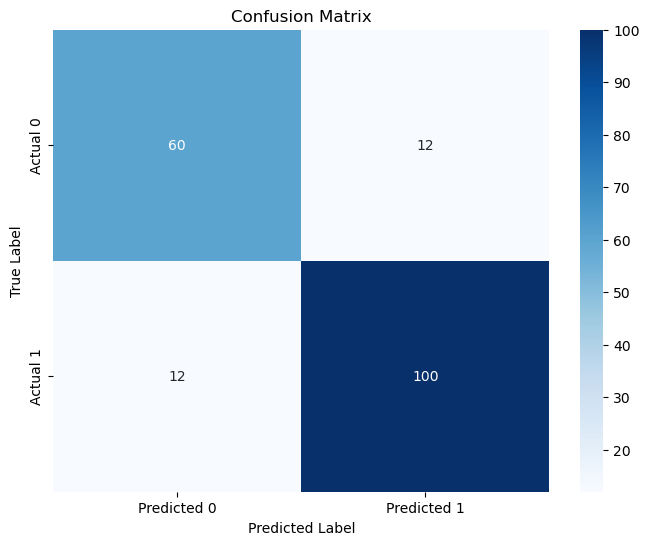

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* annot=True: shows the numerical values in each cell of the heatmap.
* cmap="Blues": sets the color map for the heatmap.
* fmt="d": format for the numerical values in the heatmap as integers.
* xticklabels and yticklabels: sets the labels for the x-axis and y-axis, respectively.